<a href="https://colab.research.google.com/github/vitormiro/estatistica_ppger_ufc/blob/main/Distribuicao_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuição Normal

Vamos usar a linguagem Python para aplicar alguns conhecimentos vistos em aula.

Aqui vamos aplicar as distribuições normal e normal padrão.



### Scipy.stats


O **SciPy**, como definido em seu próprio [guia](https://docs.scipy.org/doc/scipy/tutorial/general.html), é uma coleção de algoritmos matemáticos e funções construídas sob a extensão NumPy.


O `scipy.stats` é um sub pacote do **SciPy** que apresenta um grande conjunto de funções que permitem aplicar conceitos de probabilidade e estatística.

Para lidar com a distribuição normal vamos usar o método [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm).

In [1]:
# Importar o numpy
import numpy as np

# Importar o Matplotlib (para construção de gráficos)
import matplotlib.pyplot as plt

# Importar o método 'norm' do scipy.stats
from scipy.stats import norm

O `scipy.stats.norm` permite realizar diversas análises com a distribuição normal como gerar valores aleatórios e calcular probabilidades.

**Alguns dos métodos disponíveis**

|               |                                                                                        |
|:--------------|:---------------------------------------------------------------------------------------|
|`norm.pdf()`   |	Função densidade de probabilidade calculada em x. Retorna um array n-dimensional.    |
|`norm.cdf()`   |	Função de distribuição acumulada. Retorna a probabilidade acumulada para cada valor de x.|
|`norm.sf()`    |	'Função sobrevivência'. Retorna 1-cdf(x).                                            |
|`norm.ppf()`   |	Inversa da Função de distribuição acumulada. Retorna os percentis.                   |
|`norm.rvs()`   |	Retorna um conjunto de variáveis aleatórias.                                         |
|`norm.stats()` |	Retorna média, variância, desvio padrão ou curtose conforme definido.                |

Uma lista completa dos métodos pode ser conferida [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm).

**Parâmetros**

|        |                                                                                        |
|:-------|:---------------------------------------------------------------------------------------|
|x	     |Tipo matriz. É o conjunto de valores que representam a amostra de tamanho uniforme.     |
|loc	 |Parâmetro de localização. 'loc' representa o valor médio. Seu valor padrão é 0.         |
|scale	 |Parâmetro de escala. 'escala' representa o desvio padrão. Seu valor padrão é 1.         |
|moments |Usado para calcular estatísticas baseada em momentos: média, variância, desvio padrão e curtose. Seu valor padrão é 'mv'.|

A palavra-chave location ( loc) especifica a média. A palavra-chave scale ( scale) especifica o desvio padrão

**EXEMPLO**

Vamos lidar com o exemplo de uma variável aleatória $X$ com distribuição normal, em que $\mu=20$ e $\sigma^2 = 16$. Ou seja:

$$ X \sim N(20, 16) $$

In [2]:
# Retorna 1 único valor da distribuição
x1 = norm.rvs(loc=20, scale=4)
x1

14.563540922020572

In [3]:
# Retorna uma amostra de 100 valores da distribuição, para isso especificamos 'size=100'
X = norm.rvs(loc=20, scale=4, size=100)

# Mostrar os 100 valores da amostra gerados de uma VA com distribuição normal (média = 10 e desvio-padrão = 4)
print(X)

[18.07431467 25.45454497 18.15613762 19.61190326 17.93375711 18.66159643
 21.23399508 26.1791118  24.86297294 19.33999396 23.06706087 18.56718797
 22.44337224 20.85663866 28.86455938 17.08094727 14.8418564  13.80914342
 20.64471614 19.21612676 25.33861069 18.37888335 22.45960165 16.20971686
 16.61198986 18.37347709 22.65734691 17.84172445 15.83410926 10.3681398
 21.39309956 20.11399365 16.51848017 15.63277461 14.90965715 17.68655874
 20.69255951 17.13519587 12.51333032 16.41618588 23.6601015  19.48156416
 20.78430822 29.27429718 24.59132129 12.9304251  16.63819485 19.15162095
 12.1411058  21.20854136 18.39765584 15.5909926  23.78479384 24.3425928
 15.15810713 21.48187596 17.84456115 16.85399272 22.77381579 15.56481641
 24.38306321 29.53054778 19.64945875 17.96240395 18.15953273 27.57475599
 24.78196938 13.92702237 17.90893161 19.73286988 22.48258061 17.32385026
 30.34327943 23.83105768 22.3191362  19.97712184 19.28536067 17.14098333
 29.88947373 16.37396228 27.62429833 17.09521948 24.5

Agora vamos usar a biblioteca **matplotlib** para gerar gráficos das funções de densidade (FDP) e distribuição acumulada (FDA).

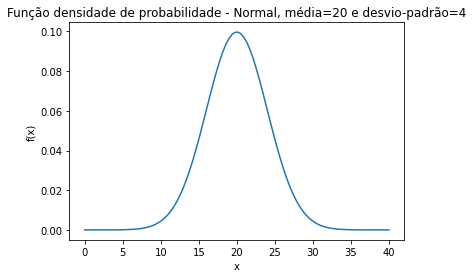

In [4]:
# Gerar 100 valores de X no intervalo 0-40
x = np.linspace(0, 40, 100)

# Valores de probabilidade para estes valores
pdf_x = norm.pdf(x, loc=20, scale=4)

# Plotar a função de densidade
plt.plot(x, pdf_x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Função densidade de probabilidade - Normal, média=20 e desvio-padrão=4")
plt.show()

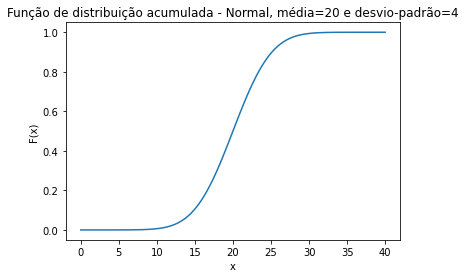

In [5]:
# Plotar a função de distribuição acumulada
cdf_x = norm.cdf(x, loc=20, scale=4)

plt.plot(x, cdf_x)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title("Função de distribuição acumulada - Normal, média=20 e desvio-padrão=4")
plt.show()

Agora vamos usar o `scipy.stats.norm` para obter valores de probabilidade, assim como usamos a tabela da normal padrão.

Mas antes vou definir uma função para construir os gráficos destacando a área que representa cada probabilidade.

In [6]:
# Intervalo para plotar o eixo x no gráfico
x = np.arange(-3, 3, 0.001)

# Função para plotar gráficos da FDP normal padrão. Vou chamar a função de 'plot_z_score'
def plot_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()


*Exemplo 1*: $P(X \leq 12)$

In [7]:
# Para encontrar a probabilidade de que a variável tenha um valor MENOR ou igual 12, usamos a FDA
round(norm.cdf(12, 20, 4)*100, 4)

2.275

In [8]:
# padronizando o valor x=12
z0 = (12 - 20)/4
print(z0)

-2.0


Note que usando a normal padrão (média = 0  e desvio-padrão = 1) apresenta o mesmo resultado.

In [9]:
round(norm.cdf(z0, 0, 1)*100, 4)

2.275

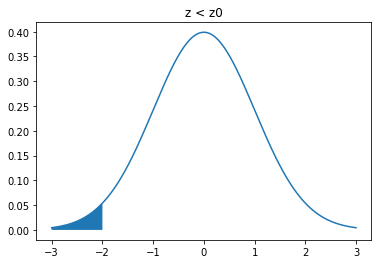

In [10]:
# Plotar gráfico
plot_z_score(x, (x < z0), 0, 1, 'z < z0')

*Exemplo 2*: $P(X \geq 25)$

In [11]:
# Para encontrar a probabilidade de que a variável tenha um valor MAIOR ou igual a 25, usamos a 'função sobrevivência'
round(norm.sf(25, 20, 4)*100, 4)

10.565

In [12]:
# padronizando o valor x=25
z0 = (25 - 20)/4
print(z0)

1.25


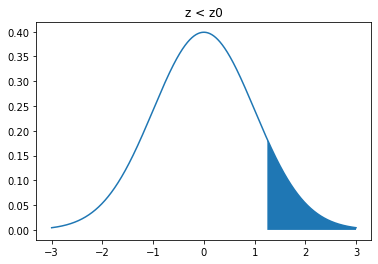

In [13]:
# Plotar gráfico
plot_z_score(x, (x > z0), 0, 1, 'z < z0')

*Exemplo 3*: $P(X \leq 24)$

In [14]:
# padronizar variável
z0 = (24 - 20)/4
print(z0)

1.0


In [15]:
# Calcular probabilidade
round(norm.cdf(z0, 0, 1)*100, 4)

84.1345

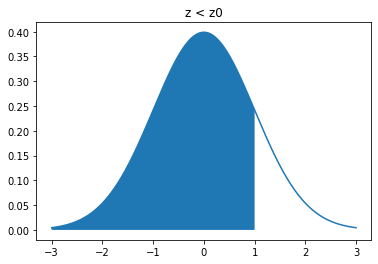

In [16]:
# Plotar gráfico
plot_z_score(x, (x < z0), 0, 1, 'z < z0')

*Exemplo 4*: $P(16 \leq X \leq 24)$

In [17]:
# padronizar variáveis
z0a = (16 - 20)/4
z0b = (24 - 20)/4
print(z0a)
print(z0b)

-1.0
1.0


In [18]:
# Calcular probabilidade
round(norm.cdf(z0b, 0, 1)*100 - norm.cdf(z0a, 0, 1)*100, 4)

68.2689

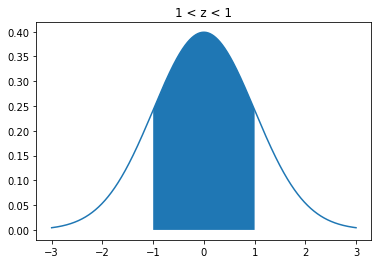

In [19]:
# Plotar gráfico
plot_z_score(x, (z0a < x) & (x < z0b), 0, 1, '1 < z < 1')